# **FastAPI-Based Sepsis Prediction API: A Machine Learning Approach for Timely Intervention of Sepsis**

Sepsis is a critical, life-threatening condition triggered by the body's response to an infection, causing harm to its own tissues and organs. Characterized by a complex syndrome, its early identification poses challenges due to symptoms that often mimic those of common illnesses like fever and low blood pressure. Leading to significant mortality rates in hospital settings, timely detection and treatment are imperative for enhancing patient outcomes.

## BUSINESS UNDERSTANDING

Recognizing the critical imperative of early detection and intervention in sepsis, a life-threatening condition, the project aims to leverage machine learning and a predictive API deployment. The objective is to furnish healthcare professionals with a tool for identifying at-risk patients. Timely intervention is paramount for improving outcomes and reducing sepsis-associated mortality rates. Thus, the project endeavors to deliver a fast, reliable, and seamlessly integrated solution within existing healthcare workflows. Ultimately, it strives to save lives and enhance patient care quality by enabling informed decisions based on precise sepsis likelihood predictions.

## Dataset Overview
The sepsis dataset comprises patient records with comprehensive clinical features, including:

- **ID**: Unique patient identification number.
- **PRG**: Plasma glucose level.
- **PL**: Blood work result 1 (mu U/ml).
- **PR**: Blood pressure (mm Hg).
- **SK**: Blood work result 2 (mm).
- **TS**: Blood work result 3 (mu U/ml).
- **M11**: Body mass index (weight in kg/(height in m)²).
- **BD2**: Blood work result 4 (mu U/ml).
- **Age**: Patient’s age (years).
- **Insurance**: Indication of whether the patient holds a valid insurance card.
- **Sepsis**: Classification indicating whether the patient has sepsis (Positive) or not (Negative).

##             HYPOTHESIS

* **Null Hypothesis (H0):**
There is no significant relationship between a patient's age and the likelihood of them having sepsis.

* **Alternative Hypothesis (H1):**
There exists a significant relationship between a patient's age and the likelihood of them having sepsis. Specifically, older patients may be more likely to develop sepsis compared to younger patients.

## QUESTIONS

1) What is the average body mass index (BMI) of patients diagnosed with sepsis compared to those without sepsis?

2) Does Age Correlate with Sepsis Occurrence?

3) What is the average age of patients diagnosed with sepsis?

4) Is there a correlation between blood pressure levels and the likelihood of developing sepsis?

5) What is the Average plasma glucose level of patients with and without Sepsis?

6) How does the distribution of insurance status differ between septic and non-septic patients?

## Importation

In [3]:
# Import necessary libraries for data handling 
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

## Data Loading

In [9]:
# Read the CSV file into a DataFrame
df = pd.read_csv('./Dataset/Paitients_Files_Train.csv')
df

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive
...,...,...,...,...,...,...,...,...,...,...,...
594,ICU200604,6,123,72,45,230,33.6,0.733,34,0,Negative
595,ICU200605,0,188,82,14,185,32.0,0.682,22,1,Positive
596,ICU200606,0,67,76,0,0,45.3,0.194,46,1,Negative
597,ICU200607,1,89,24,19,25,27.8,0.559,21,0,Negative


## Data understanding & EDA

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


In [11]:
df.isnull().sum()

ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepssis      0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [15]:
# drop unneeded column
columns_drop = ['ID']
df = df.drop(columns=columns_drop)

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PRG,599.0,3.824708,3.362839,0.000,1.000,3.000,6.000,17.00
PL,599.0,120.153589,32.682364,0.000,99.000,116.000,140.000,198.00
PR,599.0,68.732888,19.335675,0.000,64.000,70.000,80.000,122.00
SK,599.0,20.562604,16.017622,0.000,0.000,23.000,32.000,99.00
TS,599.0,79.460768,116.576176,0.000,0.000,36.000,123.500,846.00
M11,599.0,31.920033,8.008227,0.000,27.100,32.000,36.550,67.10
BD2,599.0,0.481187,0.337552,0.078,0.248,0.383,0.647,2.42
Age,599.0,33.290484,11.828446,21.000,24.000,29.000,40.000,81.00
Insurance,599.0,0.686144,0.464447,0.000,0.000,1.000,1.000,1.00


### Univariate Analysis

Skewness of PRG: 0.9140075641129112


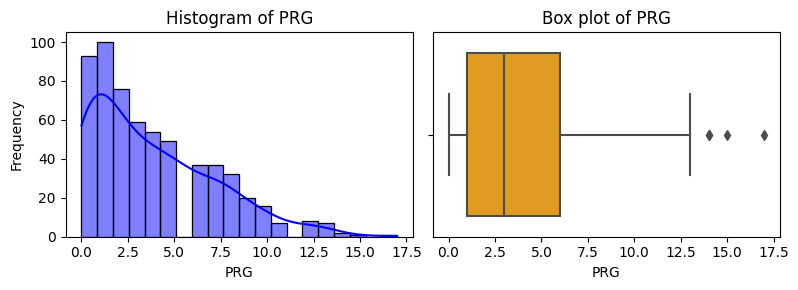

Skewness of PL: 0.11617992575441363


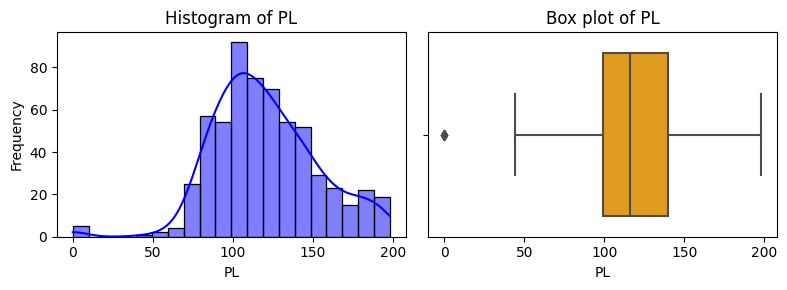

Skewness of PR: -1.8746617025518386


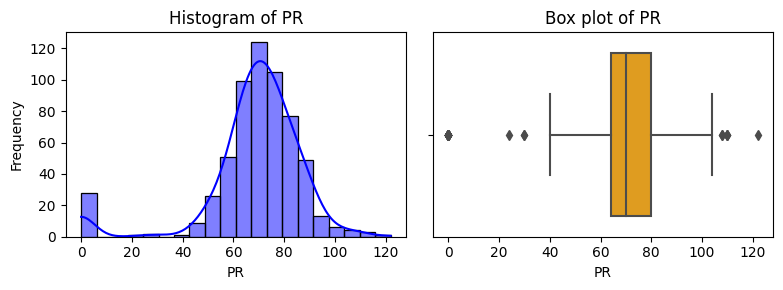

Skewness of SK: 0.1640632678373713


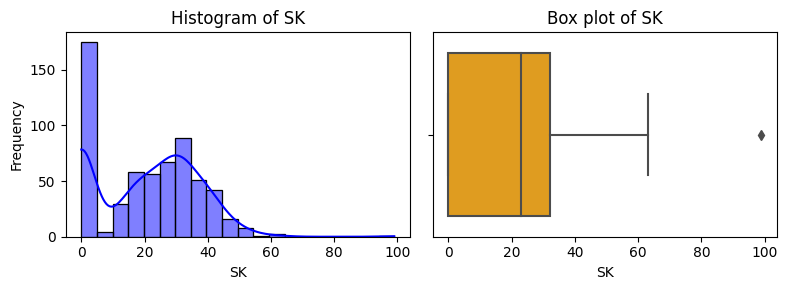

Skewness of TS: 2.401584585533378


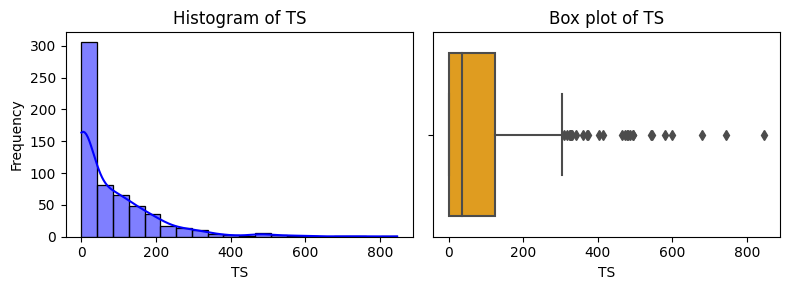

Skewness of M11: -0.40525494504790965


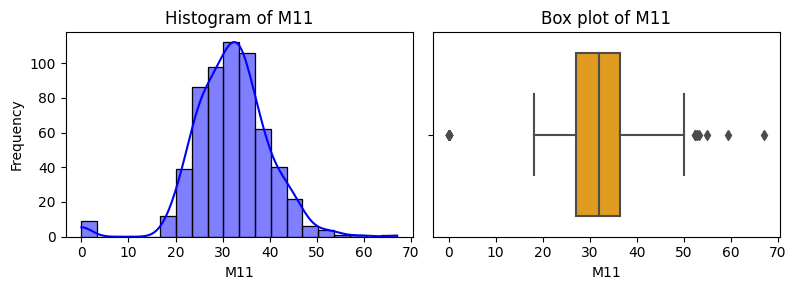

Skewness of BD2: 1.989472326608606


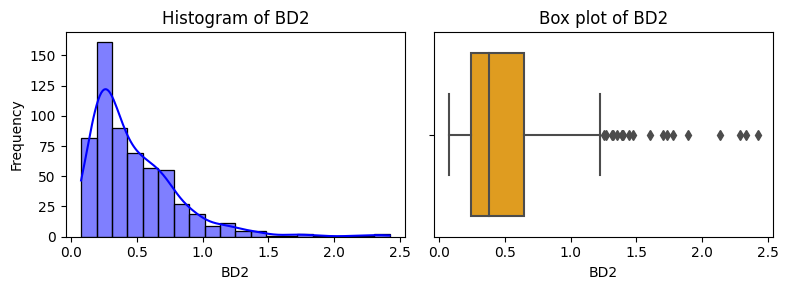

Skewness of Age: 1.1523528641533494


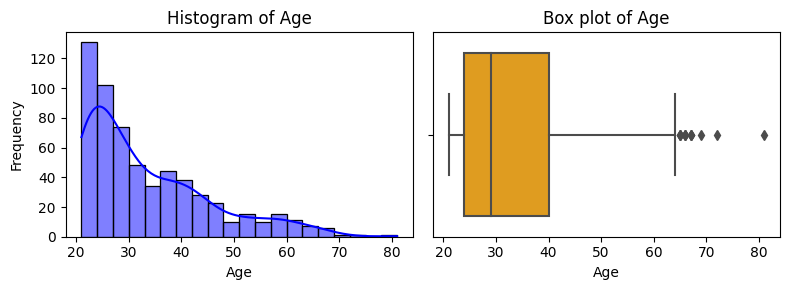

Skewness of Insurance: -0.8042567221912439


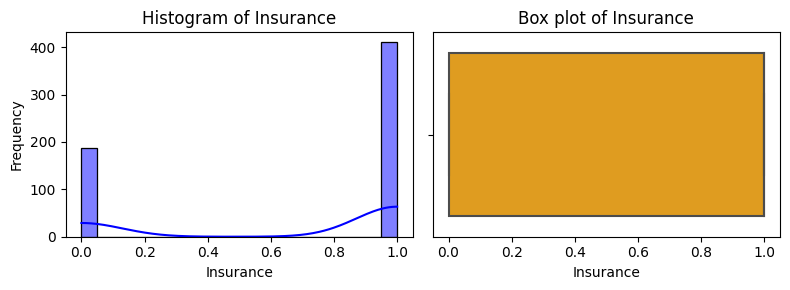

In [58]:
# Select numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Loop through each numerical column
for column in numerical_columns:
    # Set up subplots
    fig, axes = plt.subplots(1, 2, figsize=(8, 3))

    # Histogram
    sns.histplot(df[column], bins=20, kde=True, color='Blue', ax=axes[0])
    axes[0].set_title(f'Histogram of {column}')
    axes[0].set_xlabel(column)
    axes[0].set_ylabel('Frequency')
    axes[0].grid(False)

    # Box plot
    sns.boxplot(x=df[column], color='Orange', ax=axes[1])
    axes[1].set_title(f'Box plot of {column}')
    axes[1].set_xlabel(column)
    axes[1].grid(False)

    # Adjust layout
    plt.tight_layout()

    # Skewness
    skewness = df[column].skew()
    print(f"Skewness of {column}: {skewness}")

    plt.show()

#### **Insights**

### Bivariate Analysis

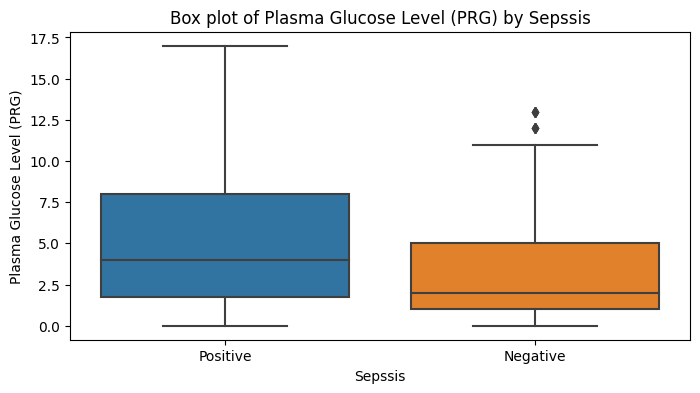

In [34]:
# Box plot for PRG by Sepssis
plt.figure(figsize=(8, 4))
sns.boxplot(x='Sepssis', y='PRG', data=df)
plt.title('Box plot of Plasma Glucose Level (PRG) by Sepssis')
plt.xlabel('Sepssis')
plt.ylabel('Plasma Glucose Level (PRG)')
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


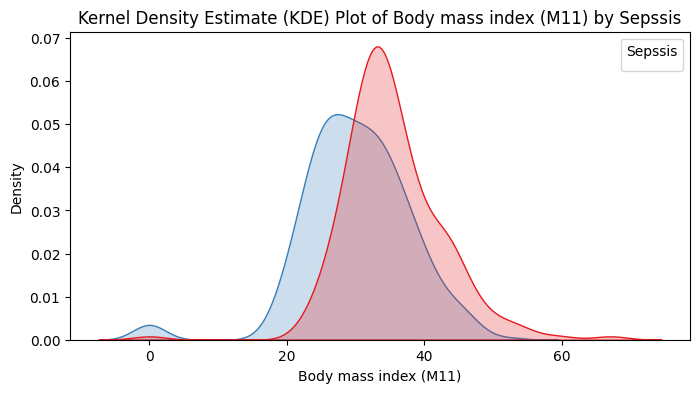

In [60]:
# KDE plot for M11 (Body mass index) by Sepssis
plt.figure(figsize=(8, 4))
sns.kdeplot(data=df, x='M11', hue='Sepssis', fill=True, palette='Set1', common_norm=False)
plt.title('Kernel Density Estimate (KDE) Plot of Body mass index (M11) by Sepssis')
plt.xlabel('Body mass index (M11)')
plt.ylabel('Density')
plt.legend(title='Sepssis')
plt.show()
